# Statistical Learning and Deep Learning - Homework 2
#### B08705038 資管四 郭子麟

## 第一題 [Data Processing]
(10%) 資料前處理是一個重要的工作，本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。我們將會沿用這個切割。

資料前處理包含以下工作:
* 生成以下numpy變數: x_train(訓練特徵)、y_train(訓練標籤)、x_test(測試特徵)、y_test(測試標籤)。用一個Dictionary組織將這些變數，其中Key為變數名稱，Value為之前生成的變數內容。
* 最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0。其他欄位為特徵。
* 把所有含有缺值的Rows刪除。
* 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。
* 所有類別欄位(如native-country與workclass)都應使用"1-of-K"轉換成0與1的欄位。
* 我們只考慮在訓練資料中出現超過(含)10次的特徵值。如果一個特徵值出現不到10次，則刪除這個特徵值所對應的1-of-K欄位。
* 你可以使用sklearn中的工具函數進行1-of-K encoding與變數標準化。

### 讀檔並展示 dataframe 確認讀檔成功

In [10]:
import numpy as np
import pandas as pd

In [11]:
# create header list and read data to from a dataframe
headers = [
  'age', 
  'workclass', 
  'fnlwgt', 
  'education', 
  'educational-num', 
  'marital-status', 
  'occupation', 
  'relationship', 
  'race', 
  'gender', 
  'capital-gain', 
  'capital-loss', 
  'hours-per-week', 
  'native-country', 
  'income'
]

# because in the dataset, ? is used to represent missing values, we need to replace it with NaN
train_raw = pd.read_csv('adult.data', header=None, names=headers, na_values=['?'], skipinitialspace=True) # skipinitialspace=True is used to remove the space before the value
test_raw = pd.read_csv('adult.test', header=None, names=headers, skiprows=1, na_values=['?'], skipinitialspace=True) # first line is not data, so skip it

print("first 5 rows of train_raw:")
display(train_raw.head())

print("last 5 rows of train_raw:")
display(train_raw.tail())

print("first 5 rows of test_raw:")
display(test_raw.head())

print("last 5 rows of test_raw:")
display(test_raw.tail())

first 5 rows of train_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


last 5 rows of train_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


first 5 rows of test_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


last 5 rows of test_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


### 將'>50K'與'<=50K'轉成 1 跟 0 並把含有 NaN 的 row 刪除

In [12]:
train_raw['income'] = train_raw['income'].map({'<=50K': 0, '>50K': 1})
test_raw['income'] = test_raw['income'].map({'<=50K.': 0, '>50K.': 1})

train_raw.dropna(inplace=True, axis=0)
test_raw.dropna(inplace=True, axis=0)

### 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。

In [13]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
train_raw[numeric_features] = scaler.fit_transform(train_raw[numeric_features])
test_raw[numeric_features] = scaler.transform(test_raw[numeric_features])

### 所有類別欄位(如native-country與workclass)都應使用"1-of-K"轉換成0與1的欄位。

In [14]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
train_raw_with_dummies = pd.get_dummies(train_raw, columns=categorical_features)
test_raw_with_dummies = pd.get_dummies(test_raw, columns=categorical_features)

### 只考慮在訓練資料中出現超過(含) 10 次的特徵值。如果一個特徵值出現不到 10 次，則刪除這個特徵值所對應的 1-of-K 欄位。

In [15]:
categorical_features_dummies_to_remove = []
categorical_features_dummies_to_remove_for_test = []
# for all categorial columns in train_raw_with_dummies
for col in train_raw_with_dummies.columns:
    if col not in numeric_features and col != 'income':
		# if the feature appears less than 10 times, remove the column
        if train_raw_with_dummies[col].sum() < 10:
            categorical_features_dummies_to_remove.append(col)

print("features to remove:", categorical_features_dummies_to_remove)
train_raw_with_dummies.drop(categorical_features_dummies_to_remove, axis=1, inplace=True)
test_raw_with_dummies.drop(categorical_features_dummies_to_remove, axis=1, inplace=True, errors='ignore')

features to remove: ['occupation_Armed-Forces', 'native-country_Holand-Netherlands']


In [16]:
test_raw_with_dummies.shape, train_raw_with_dummies.shape

((15060, 103), (30162, 103))

### 生成 dictionary 並將 x_train, y_train, x_test, y_test 轉成 numpy array

In [17]:
y_train = train_raw_with_dummies['income'].values
y_test = test_raw_with_dummies['income'].values

# 按照 pickle 的 column 順序排列
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
reordered_train_raw_with_dummies = pd.DataFrame(columns=adult50kp['columnname'])
reordered_test_raw_with_dummies = pd.DataFrame(columns=adult50kp['columnname'])
for col in adult50kp['columnname']:
    reordered_train_raw_with_dummies[col] = train_raw_with_dummies[col]
    reordered_test_raw_with_dummies[col] = test_raw_with_dummies[col]

x_train = reordered_train_raw_with_dummies.to_numpy()
x_test = reordered_test_raw_with_dummies.to_numpy()
print(x_train.shape, x_test.shape)

(30162, 102) (15060, 102)


In [18]:
adult50k = {
	'x_train': x_train,
	'y_train': y_train,
	'x_test': x_test,
	'y_test': y_test,
}

### 與 pickle 檔進行比對，確認處理完的 data 與 pickle 相同

In [118]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


## 第二題 [ROC and AUC]
(35%) Receiver operation characteristic (ROC) 曲線以及其線下面積 (Area Under Curve; AUC) 為衡量分類器預測能力常用的工具。  
本題將練習繪製ROC以及計算AUC。在這之前我們必須載入資料，訓練模型，並進行預測：

In [123]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
# train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
# make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)    

Accuracy = 0.848340


### Q2.1 (17.5%): 基於 `adult50kp['y_test']` 與 `ypredprob` 繪製ROC Curve。

### Move a threshold on the sorted instances, and calculate corresponding confusion matrix for each threshold

In [124]:
def cal_confusion_matrix_return_4_values(y, ypred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(y.shape[0]):
        if y[i] == 1 and ypred[i] == 1:
            tp += 1
        elif y[i] == 0 and ypred[i] == 0:
            tn += 1
        elif y[i] == 0 and ypred[i] == 1:
            fp += 1
        elif y[i] == 1 and ypred[i] == 0:
            fn += 1
    return tp, tn, fp, fn

In [125]:
dict = {
    'y_test': adult50kp['y_test'],
    'y_pred_pos': ypredprob[:,1],
}
instances = pd.DataFrame(dict)
instances.sort_values(by=['y_pred_pos'], ascending=False, inplace=True)
instances.reset_index(drop=True, inplace=True)

# define fpr_tpr list, for every element, it is a array of [fpr, tpr]
fpr_tpr = []
# do first new prediction based on first threshold
tp, fp, tn, fn = 0, 0, 0, 0
threshold = instances['y_pred_pos'][0]
y_pred_new = instances['y_pred_pos'].map(lambda x: 1 if x >= threshold else 0)
tp, tn, fp, fn = cal_confusion_matrix_return_4_values(instances['y_test'], y_pred_new)
print(f"tp, tn, fp, fn = {tp}, {tn}, {fp}, {fn}")
fpr_tpr.append([fp/(fp+tn), tp/(tp+fn)])

for i in range(instances.shape[0]):
    # 每次多一個 predict positive 因此要看 true class
    if instances['y_test'][i] > 0:
        tp += 1
        fn -= 1
    else:
        fp += 1
        tn -= 1
    fpr_tpr.append([fp/(fp+tn), tp/(tp+fn)])


tp, tn, fp, fn = 1, 11360, 0, 3699


### Plot the ROC curve based on false positive rate and true positive rate

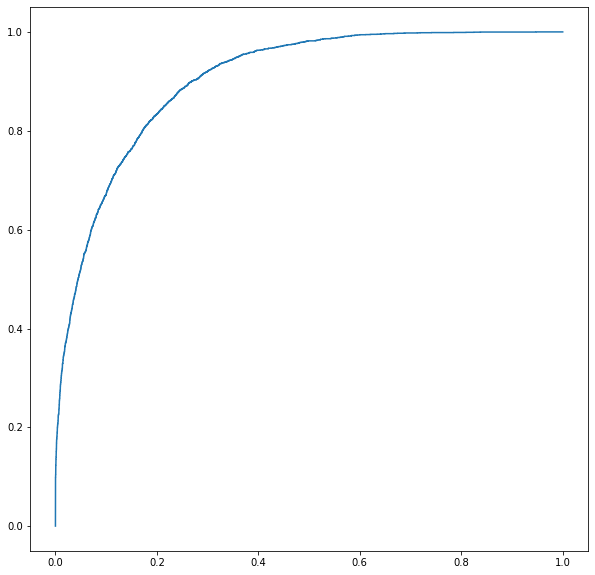

In [126]:
# plot ROC curve by fpr_tpr
import matplotlib.pyplot as plt
# make graph larger

# sort fpr_tpr by fpr
fpr_tpr.sort(key=lambda x: x[0])
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot([x[0] for x in fpr_tpr], [x[1] for x in fpr_tpr])

### Q2.2 (17.5%): 計算繪製出的 ROC Curve 的 AUC。

In [129]:
# count AUC based on fpr_tpr
# sort fpr_tpr by fpr
fpr_tpr.sort(key=lambda x: x[0])
auc = 0
for i in range(len(fpr_tpr)-1):
    auc += (fpr_tpr[i+1][0] - fpr_tpr[i][0]) * (fpr_tpr[i+1][1] + fpr_tpr[i][1]) / 2
print(f"AUC = {auc}")

AUC = 0.9037639179673276


## 第三題 [Logistic Regression with L2 Regularization]

### Q3.1 (15%) Derive the gradient and hessian matrix for the new E(w).

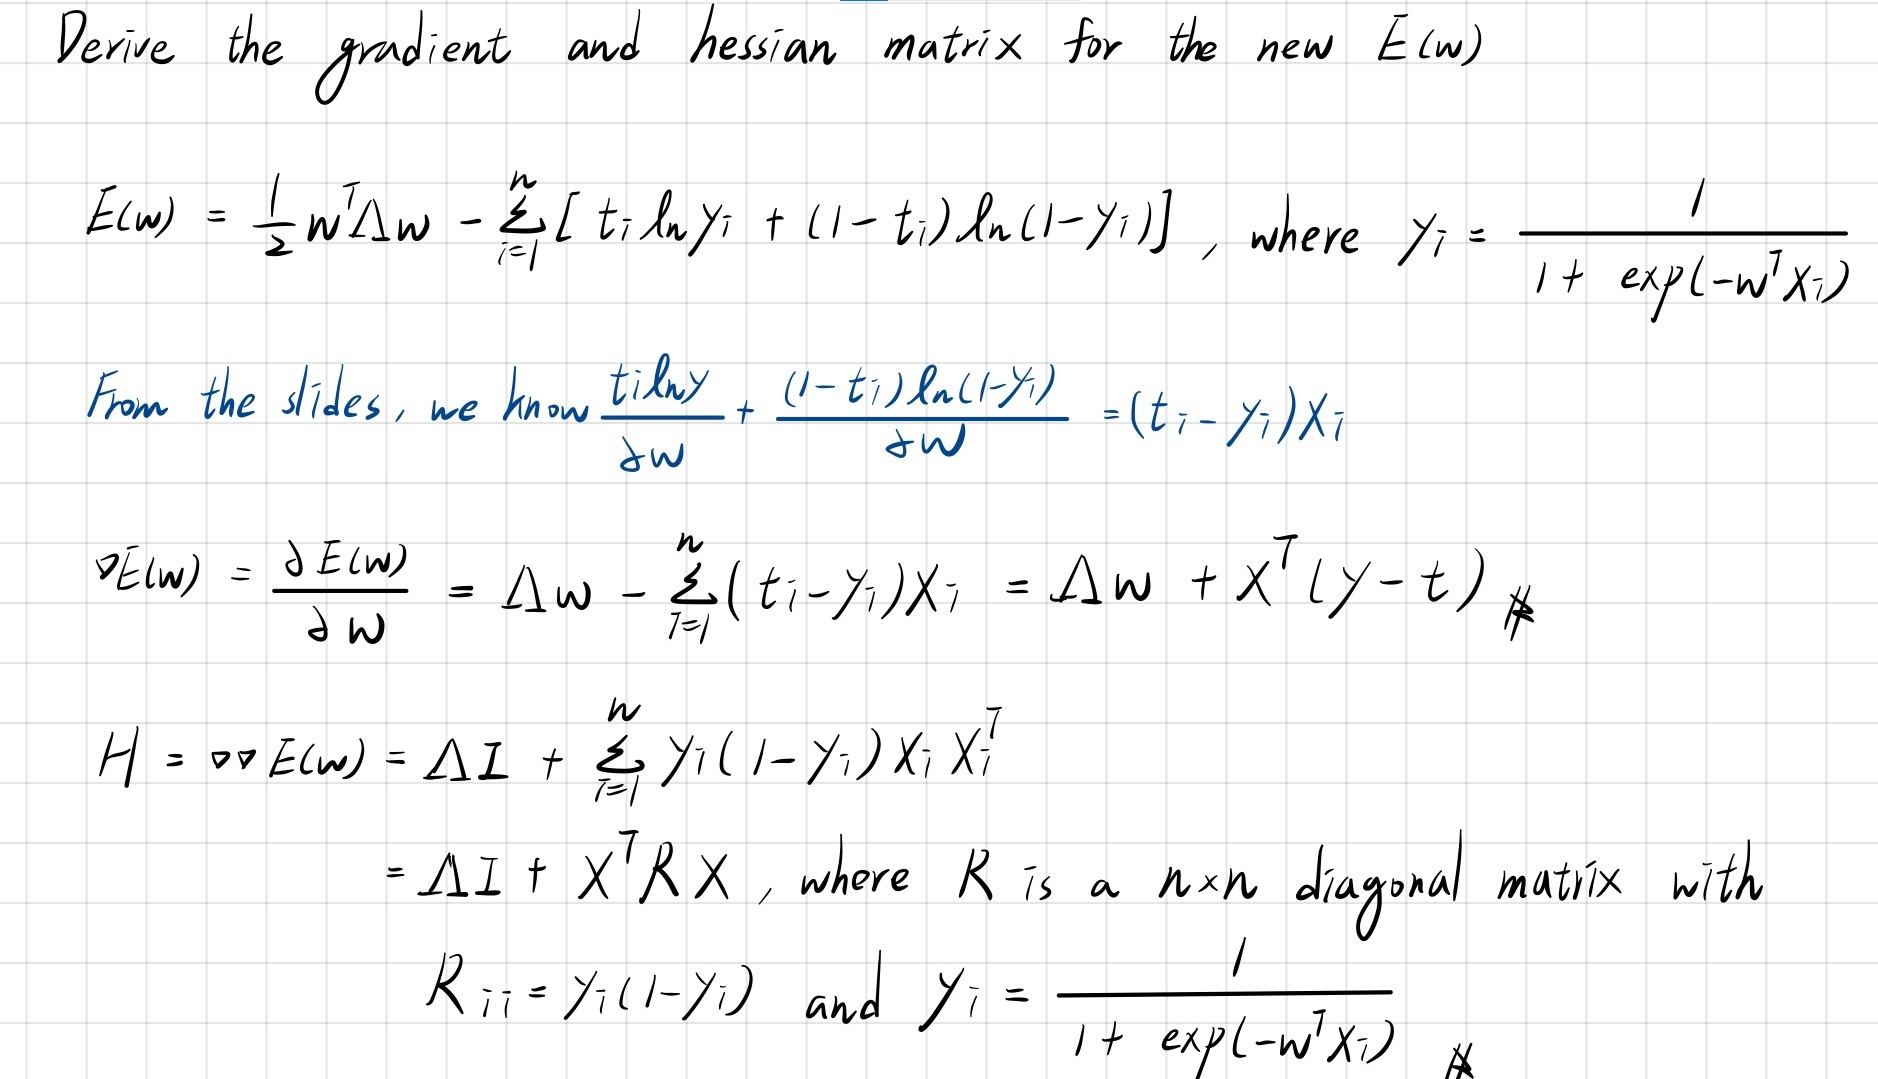

In [20]:
# display jpg image
from IPython.display import Image
Image(filename='q3-1_handwriting.jpg')

### Q3.2 (25%) Create your mylogistic_l2 class. Train your model and show the learned $w$ as well as test accuracy for the cases below. If $w$ is too long for you, show selected $w$ for continuous-valued, binary-valued, and the constant term.  
* Case 1: lambda = 1 for all coefficients
* Case 2: lambda = 1 for all but the intercept, no regularization for intercept term.
* Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.

### Define mylogistic_l2 class

In [1]:
import numpy as np
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        ### Add your code here
        self.reg_vec = np.diag(reg_vec)
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept
    
    def __sigmoid(self, x, w):
        """x: feature matrix
           w: weight vector
           return: sigmoid(xw)"""
        return 1 / (1 + np.exp(-x.dot(w)))
    def fit(self, x, y, verbal = False):
        # Add your code here
        if self.add_intercept:
            x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
        # initialize w with closed-form ridge regression
        # b = average of lambda
        b = np.mean(self.reg_vec)
        self.w = np.linalg.inv(x.T @ x + b * np.identity(x.shape[1])) @ x.T @ y

        # Newton method
        obj = np.inf # to check if converge
        for i in range(self.max_iter):
            current_y = self.__sigmoid(x, self.w)
            # compute gradient and hessian
            gradient = self.reg_vec @ self.w + x.T @ (current_y - y)
            r = np.diag(current_y * (1 - current_y))
            hessian = self.reg_vec + x.T @ r @ x

            # update w
            w_new = self.w - np.linalg.inv(hessian) @ gradient
            # compute objective function
            obj_new = (w_new.T @ self.reg_vec @ w_new) / 2 - (y @ np.log(current_y) + (1 - y) @ np.log(1 - current_y))
            if verbal:
                print(f"iter {i}: obj = {obj_new}")
            if abs(obj_new - obj) < self.tol:
                print(f"Converge at iter {i}")
                break
            obj = obj_new
            self.w = w_new
            
    def predict(self, x):
        """doing prediction"""
        ### add your code here.
        if self.add_intercept:
            x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
        predict_prob = self.__sigmoid(x, self.w)
        # use 0.5 as threshold
        predict = np.where(predict_prob >= 0.5, 1, 0)
        return predict

### Read dataset

In [2]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

# You can access the training and test data using the following keys: 'x_train', 'x_test', 'y_train', 'y_test'. 
# In addition, the key 'columnname' map the a list of column names, and the key 'num_col' map to a list of numeric columns.
X_train = adult50kp['x_train']
X_test = adult50kp['x_test']
Y_train = adult50kp['y_train']
Y_test = adult50kp['y_test']

#### Case 1. lambda = 1 for all coefficients

#### Set lambda_vec and train

In [5]:
lambda_vec = np.ones(X_train.shape[1] + 1)
logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred = logic1.predict(X_test)

Converge at iter 8


#### Calculate Accuracy and show weights

In [6]:
acc = np.sum(ypred == Y_test) / Y_test.shape[0]
print(f"Accuracy = {acc}")
# print weights
print(f"continous-valued weights = {logic1.w[:6]}")
print(f"binary-valued weights = {logic1.w[6:logic1.w.shape[0]-1]}")
print(f"intercept term weight = {logic1.w[-1]}")

Accuracy = 0.847875166002656
continous-valued weights = [0.25831075 0.35295138 2.33390153 0.75114521 0.33352443 0.07923687]
binary-valued weights = [-2.59305996e-01 -3.31058935e-02 -8.02092305e-01 -1.16328381e+00
 -1.57480242e-01  1.06974336e+00 -6.33846060e-01  1.16732407e-01
 -2.31567383e-01 -5.17122209e-01 -7.97216481e-02 -1.09949780e+00
 -2.46027090e-01  6.19694925e-02  1.26685883e-01  8.62656059e-01
 -9.18352843e-01 -6.21226177e-01 -2.00740224e-01 -7.51600981e-01
 -1.61011588e+00  5.75820911e-01  6.48995282e-01  3.53741433e-01
  7.17218474e-01 -2.84494746e-02 -9.54820902e-04 -1.96540899e-01
 -1.46351641e-01  6.26946274e-01  4.48207080e-01  2.45945817e-02
  4.69223656e-02 -4.91067747e-01 -2.03035424e-01 -1.63303681e-01
 -1.76623509e-02 -1.11328323e-01 -9.94618248e-02 -1.17391916e+00
  1.80702677e-01 -6.92720011e-02  9.76496905e-01  4.60988601e-01
 -4.95440415e-01 -1.27203531e+00  4.86772406e-01 -8.98963733e-01
 -6.00542600e-02 -3.50848853e-01  4.32815220e-01  5.94120149e-01
  5.821

### Case 2. lambda = 1 for all but the intercept, no regularization for intercept term.

#### Set lambda_vec and train

In [7]:
feature_num = X_train.shape[1]
lambda_vec_case_2 = np.ones(feature_num + 1)
# set lambda for intercept term to 0
lambda_vec_case_2[-1] = 0
logic2 = mylogistic_l2(reg_vec = lambda_vec_case_2, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic2.fit(X_train, Y_train, verbal = True)
ypred_2 = logic2.predict(X_test)

iter 0: obj = 21193.18699600823
iter 1: obj = 11777.772834219251
iter 2: obj = 10294.32952392708
iter 3: obj = 9850.222617639063
iter 4: obj = 9778.168346189175
iter 5: obj = 9773.250947924738
iter 6: obj = 9773.112183506511
iter 7: obj = 9773.111183721507
iter 8: obj = 9773.11118355854
Converge at iter 8


#### Calculate Accuracy and show weights

In [8]:
acc_2 = np.sum(ypred_2 == Y_test) / Y_test.shape[0]
print(f"Accuracy = {acc_2}")
# print weights
print(f"continous-valued weights = {logic2.w[:6]}")
print(f"binary-valued weights = {logic2.w[6:logic2.w.shape[0]-1]}")
print(f"intercept term weight = {logic2.w[-1]}")

Accuracy = 0.8477423638778221
continous-valued weights = [0.25833063 0.35307341 2.33348256 0.7378757  0.33385106 0.07926886]
binary-valued weights = [-0.04219572  0.19987643 -0.58360967 -0.93671318  0.0754847   1.28715744
 -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
 -0.09910239 -0.64944042 -1.55235099  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.0728464  -0.11752645 -0.06282948  0.67242506
  0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
  0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
 -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160106 

### Case 3. lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.

#### Set lambda_vec and train

In [14]:
feature_num = X_train.shape[1]
lambda_vec_case_3 = np.ones(feature_num + 1)
for i in range(feature_num):
    if i < 6:
        lambda_vec_case_3[i] = 1
    else:
        lambda_vec_case_3[i] = 0.5
# set lambda for intercept term to 0
lambda_vec_case_3[-1] = 0

logic3 = mylogistic_l2(reg_vec = lambda_vec_case_3, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic3.fit(X_train, Y_train, verbal = True)
ypred_3 = logic3.predict(X_test)

iter 0: obj = 21191.857158290903
iter 1: obj = 11774.11800250116
iter 2: obj = 10288.554764617063
iter 3: obj = 9842.712612741932
iter 4: obj = 9769.874060371954
iter 5: obj = 9764.427044817206
iter 6: obj = 9764.224448421459
iter 7: obj = 9764.222592728347
iter 8: obj = 9764.222592337484
Converge at iter 8


#### Calculate Accuracy and show weights

In [15]:
acc_3 = np.sum(ypred_3 == Y_test) / Y_test.shape[0]
print(f"Accuracy = {acc_3}")
# print weights
print(f"continous-valued weights = {logic3.w[:6]}")
print(f"binary-valued weights = {logic3.w[6:logic3.w.shape[0]-1]}")
print(f"intercept term weight = {logic3.w[-1]}")

Accuracy = 0.847675962815405
continous-valued weights = [0.25851661 0.3533387  2.33562764 0.7825921  0.33439916 0.07940036]
binary-valued weights = [-0.08347988  0.23309138 -0.59278097 -0.92248498  0.11139578  1.25425868
 -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283129 -0.42890321
  0.42890321  0.23635124  0.30021363  1.03810523 -0.75216084 -0.45341369
 -0.02691155 -0.58252688 -2.00075405  0.75127893  0.82696619  0.52830707
  0.89488996  0.14510376  0.18253094 -0.02583999  0.00991404  0.89862004
  0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
  0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
  1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
 -0.00957212 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
 -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
  0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
 -0.29178766 -0.38125401 -0.96291964 -0.45007954  

### Q3.3 (10%) Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters. Set the regularization coefficient for the constant term to zero. Allow different regularizations for continuous-valued and binary-valued features. Let $a_1$ and $a_2$ denote the regularization coefficients for continuous-valued and binary-valued features. Search the best $a_1$ and $a_2$ and report the test accuracy using the best hyper-parameters. You should follow the following procedure to search for the best hyperparameters. 
1. Choose a set of grids among a reasonable range. For example, 10 grids in [0.01, 100]. 
2. Conduct grid search with the constraint that $a_1 = a_2$. Record the best value $a_1^*$ and $a_2^*$.
3. Fix $a_1 = a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$. 
4. Fix $a_2 = a_2^*$, and search $a_1$ for the best value.
5. Report the selected $a_1$ and $a_2$.
6. Train a model using the selected hyper-parameters, and report the test accuracy.

#### split the training data into subtraining and tuning set

In [3]:
from sklearn.model_selection import train_test_split

x_subtrain, x_tune, y_subtrain, y_tune = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 0)

#### using np.logspace to generate a set of grids and conduct procedure 2 above

In [5]:
grids = np.logspace(start = -2, stop = 2, num = 10) # from 0.01 to 100
print(f"grids = {grids}")
# conduct grid search with constraint that a1 = a2, record the best a1* and a2*
acc_list = []
for candidate_coef in grids:
    # a1 is regularization coefficient for continuous-valued features
    # a2 is regularization coefficient for binary-valued features
    # first six features are continuous-valued, the rest except last one are binary-valued
    lambda_vec = np.ones(x_subtrain.shape[1] + 1) * candidate_coef
    lambda_vec[-1] = 0
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(x_subtrain, y_subtrain)
    ypred = logic.predict(x_tune)
    acc = np.sum(ypred == y_tune) / y_tune.shape[0]
    print(f"for candidate_coef = {candidate_coef}, accuracy = {acc}")
    acc_list.append(acc)

best_coef = grids[np.argmax(acc_list)]
print(f"best regularization coefficient for a1 and a2 are {best_coef}")

grids = [1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]
Converge at iter 11
for candidate_coef = 0.01, accuracy = 0.8452104739807756
Converge at iter 10
for candidate_coef = 0.027825594022071243, accuracy = 0.8452104739807756
Converge at iter 9
for candidate_coef = 0.0774263682681127, accuracy = 0.8452104739807756
Converge at iter 9
for candidate_coef = 0.21544346900318834, accuracy = 0.8452104739807756
Converge at iter 8
for candidate_coef = 0.5994842503189409, accuracy = 0.8452104739807756
Converge at iter 8
for candidate_coef = 1.6681005372000592, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 4.6415888336127775, accuracy = 0.8458733841564468
Converge at iter 8
for candidate_coef = 12.915496650148826, accuracy = 0.8455419290686113
Converge at iter 8
for candidate_coef = 35.93813663804626, accuracy = 0.8452104739807756
Converge at iter 7
for candidate_coef 

Best a1 and a2 are 1.6681005372000592

#### Fix $a_1 = a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$. 

In [9]:
a1 = best_coef
acc_list_for_searching_a2 = []
# Fix $a_1 = a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$. 
for candidate_coef in grids:
    lambda_vec = np.ones(x_subtrain.shape[1] + 1) * a1
    lambda_vec[6:lambda_vec.shape[0]-1] = candidate_coef
    lambda_vec[-1] = 0
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(x_subtrain, y_subtrain)
    ypred = logic.predict(x_tune)
    acc = np.sum(ypred == y_tune) / y_tune.shape[0]
    print(f"for candidate_coef = {candidate_coef}, accuracy = {acc}")
    acc_list_for_searching_a2.append(acc)

best_a2_coef = grids[np.argmax(acc_list_for_searching_a2)]
print(f"best regularization coefficient for a2 under a1 = {a1} is {best_a2_coef}")

Converge at iter 11
for candidate_coef = 0.01, accuracy = 0.8455419290686113
Converge at iter 10
for candidate_coef = 0.027825594022071243, accuracy = 0.8455419290686113
Converge at iter 9
for candidate_coef = 0.0774263682681127, accuracy = 0.8452104739807756
Converge at iter 9
for candidate_coef = 0.21544346900318834, accuracy = 0.8452104739807756
Converge at iter 8
for candidate_coef = 0.5994842503189409, accuracy = 0.8452104739807756
Converge at iter 8
for candidate_coef = 1.6681005372000592, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 4.6415888336127775, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 12.915496650148826, accuracy = 0.8452104739807756
Converge at iter 8
for candidate_coef = 35.93813663804626, accuracy = 0.8458733841564468
Converge at iter 7
for candidate_coef = 100.0, accuracy = 0.8445475638051044
best regularization coefficient for a2 under a1 = 1.6681005372000592 is 1.6681005372000592


new a2 after fixing a1 is still 1.6681005372000592

Fix $a_2 = a_2^*$, and search $a_1$ for the best value.

In [13]:
a2 = best_a2_coef
acc_list_for_searching_a1 = []
for candidate_coef in grids:
    lambda_vec = np.ones(x_subtrain.shape[1] + 1) * a2
    lambda_vec[0:6] = candidate_coef
    lambda_vec[-1] = 0
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(x_subtrain, y_subtrain)
    ypred = logic.predict(x_tune)
    acc = np.sum(ypred == y_tune) / y_tune.shape[0]
    print(f"for candidate_coef = {candidate_coef}, accuracy = {acc}")
    acc_list_for_searching_a1.append(acc)

best_a1_coef = grids[np.argmax(acc_list_for_searching_a1)]
print(f"best regularization coefficient for a1 under a2 = {a2} is {best_a1_coef}")

Converge at iter 8
for candidate_coef = 0.01, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 0.027825594022071243, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 0.0774263682681127, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 0.21544346900318834, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 0.5994842503189409, accuracy = 0.8458733841564468
Converge at iter 8
for candidate_coef = 1.6681005372000592, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 4.6415888336127775, accuracy = 0.8458733841564468
Converge at iter 8
for candidate_coef = 12.915496650148826, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 35.93813663804626, accuracy = 0.8462048392442824
Converge at iter 8
for candidate_coef = 100.0, accuracy = 0.8458733841564468
best regularization coefficient for a1 under a2 = 1.6681005372000592 is 0.01


new a1 after fixing a2 becomes 0.01

##### final: a1: 0.01, a2: 1.6681005372000592

In [15]:
a1 = best_a1_coef
a2 = best_a2_coef
lambda_vec = np.ones(x_subtrain.shape[1] + 1) * a1
lambda_vec[6:lambda_vec.shape[0]-1] = a2
lambda_vec[-1] = 0
logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic.fit(x_subtrain, y_subtrain, verbal = True)
ypred = logic.predict(x_tune)
acc = np.sum(ypred == y_tune) / y_tune.shape[0]
print(f"for a1 = {a1}, a2 = {a2}, accuracy = {acc}")

iter 0: obj = 19078.509591469803
iter 1: obj = 10601.511010599377
iter 2: obj = 9269.825175761382
iter 3: obj = 8872.33971528803
iter 4: obj = 8808.744594533786
iter 5: obj = 8804.564410288674
iter 6: obj = 8804.437790026763
iter 7: obj = 8804.436719294863
iter 8: obj = 8804.43671913156
Converge at iter 8
for a1 = 0.01, a2 = 1.6681005372000592, accuracy = 0.8462048392442824


### Q3.4 (5%) Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning). Compare the estimated parameters and test accuracy with those from your own models.

In [18]:
from sklearn.linear_model import LogisticRegression

# use grids for hyperparameter tuning
sklearn_logistic_acc_list = []
for candidate_coef in grids:
    logic = LogisticRegression(C = candidate_coef, fit_intercept = True, max_iter = 1000, tol = 1e-5)
    logic.fit(x_subtrain, y_subtrain)
    ypred = logic.predict(x_tune)
    acc = np.sum(ypred == y_tune) / y_tune.shape[0]
    sklearn_logistic_acc_list.append(acc)
    print(f"for candidate_coef = {candidate_coef}, accuracy = {acc}")

best_coef = grids[np.argmax(sklearn_logistic_acc_list)]
print(f"best regularization coefficient for sklearn logistic regression is {best_coef}")

# use the best hyperparameter to train the model
logic = LogisticRegression(C = best_coef, fit_intercept = True, max_iter = 1000, tol = 1e-5)
logic.fit(x_subtrain, y_subtrain)
ypred = logic.predict(x_tune)
acc_for_sk_logic = np.sum(ypred == y_tune) / y_tune.shape[0]
print(f"for sklearn logistic regression with C = {best_coef}, accuracy = {acc_for_sk_logic }")

for candidate_coef = 0.01, accuracy = 0.8442161087172688
for candidate_coef = 0.027825594022071243, accuracy = 0.8452104739807756
for candidate_coef = 0.0774263682681127, accuracy = 0.8455419290686113
for candidate_coef = 0.21544346900318834, accuracy = 0.8458733841564468
for candidate_coef = 0.5994842503189409, accuracy = 0.8462048392442824
for candidate_coef = 1.6681005372000592, accuracy = 0.8452104739807756
for candidate_coef = 4.6415888336127775, accuracy = 0.8452104739807756
for candidate_coef = 12.915496650148826, accuracy = 0.8452104739807756
for candidate_coef = 35.93813663804626, accuracy = 0.8452104739807756
for candidate_coef = 100.0, accuracy = 0.8452104739807756
best regularization coefficient for sklearn logistic regression is 0.5994842503189409
for sklearn logistic regression with C = 0.5994842503189409, accuracy = 0.8462048392442824


##### Difference
1. The best accuracy gained from `mylogistic_l2` is pretty close to the accuracy gained from `sklearn.linear_model.LogisticRegression`
2. When a1 = $0.01$ and a2 = $1.6681005372000592$, `mylogistic_l2` has the best accuracy; However in `sklearn.linear_model.LogisticRegression`, the best accuracy happens when the regularization coefficient is set to $0.5994842503189409$
3. Although `mylogistic_l2` and `sklearn.linear_model.LogisticRegression` are nearly the same in best accuracy from tuning, they have a huge difference in computing time. `sklearn.linear_model.LogisticRegression` only needs $20.9$ seconds to finish $10$ rounds of hyperparameter tuning, but `mylogistic_l2` spends almost $60$ to $80$ seconds just for one model fit, thus $10$ rounds of tuning will take $500$ to $800$ seconds. It proves that our model is good at accuracy but doesn't perform well on efficiency.